# CARREGAR A BASE DE DADOS (ARQUIVOS NPY)

                     filename  \
0  SBBE_2015-08-08_E6_100.png   
1  SBBE_2015-08-08_E6_110.png   
2  SBBE_2015-08-08_E6_120.png   
3  SBBE_2015-08-08_E6_130.png   
4  SBBE_2015-08-08_E6_140.png   

                                               image  clusters  
0  [[[0.3764705882352941, 0.42745098039215684, 0....         3  
1  [[[0.19607843137254902, 0.24313725490196078, 0...         3  
2  [[[0.3568627450980392, 0.38823529411764707, 0....         3  
3  [[[0.28627450980392155, 0.34509803921568627, 0...         3  
4  [[[0.2823529411764706, 0.30980392156862746, 0....         3  


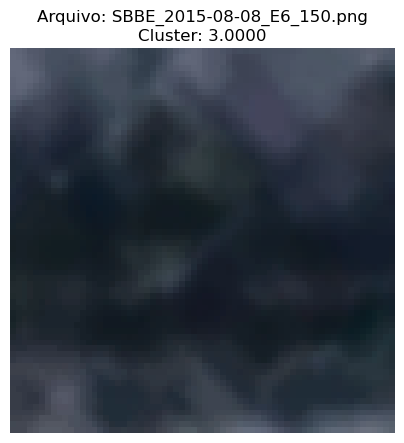

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para os arquivos .npy
images_file_path = r'C:\Users\silve\TESE\images_by_cluster_80.npy'
coefs_file_path = r'C:\Users\silve\TESE\clusters_80.npy'
filenames_file_path = r'C:\Users\silve\TESE\filenames_80.npy'  # Caminho para o arquivo com os nomes dos arquivos

# Carregar os arrays numpy dos arquivos .npy
images_array = np.load(images_file_path, allow_pickle=True)
coefs_array = np.load(coefs_file_path, allow_pickle=True)
filenames_array = np.load(filenames_file_path, allow_pickle=True)  # Carregar o array com os nomes dos arquivos

# Reconstruir o DataFrame incluindo a coluna de nomes de arquivos
df_images = pd.DataFrame({
    'filename': filenames_array,  # Adicionar os nomes dos arquivos como uma nova coluna
    'image': list(images_array),  # Converter o array de imagens para uma lista de arrays
    'clusters': coefs_array
})

# Exibir as primeiras linhas do DataFrame para confirmar a estrutura
print(df_images.head())

# Função para exibir uma imagem do DataFrame, seu coeficiente e o nome do arquivo
def display_image_and_cluster(df, index):
    # Verificar se o índice é válido
    if index < 0 or index >= len(df):
        print("Índice fora do intervalo.")
        return

    # Acessar a imagem, o coeficiente e o nome do arquivo
    image_array = df.at[index, 'image']
    cluster = df.at[index, 'clusters']
    filename = df.at[index, 'filename']

    # Configurar a figura
    plt.figure(figsize=(5, 5))

    # Exibir a imagem
    plt.imshow(image_array)
    plt.axis('off')  # Desligar os eixos para uma visualização mais clara

    # Exibir o coeficiente de cluster e o nome do arquivo como título
    plt.title(f'Arquivo: {filename}\nCluster: {cluster:.4f}', fontsize=12)

    # Mostrar a figura
    plt.show()

# Exemplo de uso da função para exibir a imagem no índice 5, seu coeficiente e o nome do arquivo
display_image_and_cluster(df_images, 5)


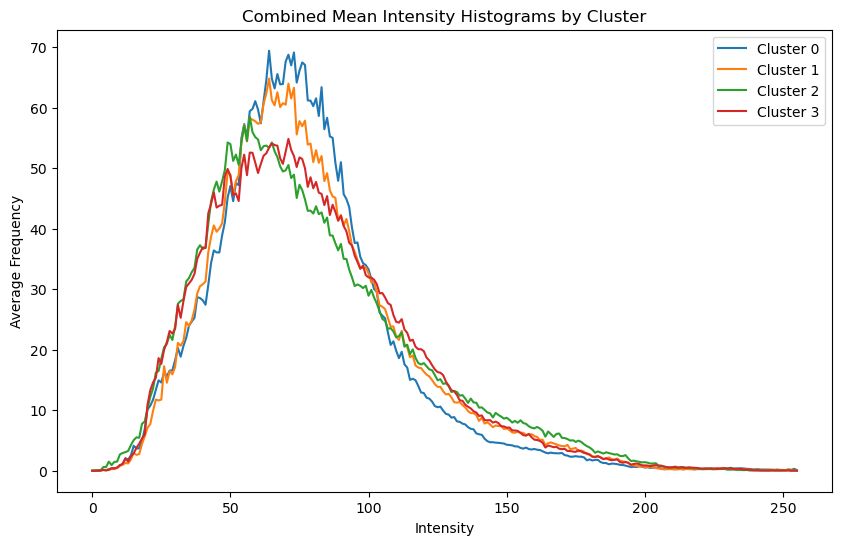

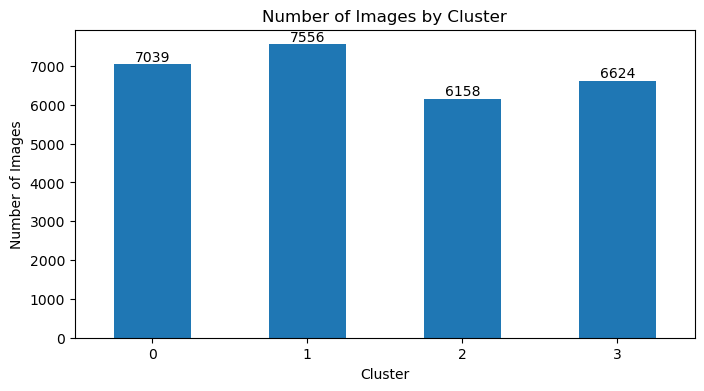

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Assuming df_images has been defined as per your previous code

def plot_combined_mean_histograms_by_cluster(df_images):
    unique_clusters = np.unique(df_images['clusters'])
    plt.figure(figsize=(10, 6))

    for cluster in unique_clusters:
        cluster_images = df_images[df_images['clusters'] == cluster]['image']
        hist_accumulator = np.zeros(256)
        num_images = len(cluster_images)

        for img_array in cluster_images:
            # Convert to grayscale if it's an RGB image
            if img_array.ndim == 3:
                img_array = rgb2gray(img_array)
            # Calculate the image histogram
            hist, _ = np.histogram(img_array.flatten(), bins=256, range=(0, 1))
            hist_accumulator += hist

        # Calculate the mean histogram
        mean_histogram = hist_accumulator / num_images

        # Plot the mean histogram for each cluster
        plt.plot(mean_histogram, label=f'Cluster {cluster}')

    plt.title('Combined Mean Intensity Histograms by Cluster')
    plt.xlabel('Intensity')
    plt.ylabel('Average Frequency')
    plt.legend()
    plt.show()

def plot_images_count_by_cluster(df_images):
    # Count the number of images per cluster
    cluster_counts = df_images['clusters'].value_counts().sort_index()
    
    # Plot the histogram of the number of images per cluster
    plt.figure(figsize=(8, 4))
    bars = cluster_counts.plot(kind='bar')
    plt.title('Number of Images by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=0)
    
    # Add text label above each bar
    for i, value in enumerate(cluster_counts):
        plt.text(i, value, str(value), ha='center', va='bottom')

    plt.show()

# Call the functions to plot the histograms
plot_combined_mean_histograms_by_cluster(df_images)
plot_images_count_by_cluster(df_images)


# CRIAÇÃO DOS GRUPOS DE TREINO, VALIDAÇÃO E TESTE

In [3]:
from sklearn.model_selection import train_test_split

# Dividir o DataFrame em conjunto de treino e teste
train_df, test_df = train_test_split(df_images, test_size=0.2, random_state=42)

# Dividir o conjunto de treino para criar o conjunto de validação
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print(f'Tamanho do conjunto de treino: {len(train_df)}')
print(f'Tamanho do conjunto de validação: {len(val_df)}')
print(f'Tamanho do conjunto de teste: {len(test_df)}')

# Função para preparar os dados, incluindo os filenames
def prepare_data(df):
    """Extrai imagens, clusters e filenames do DataFrame e os converte em arrays numpy."""
    images = np.array(list(df['image']))  # Listar e converter para array numpy
    clusters = np.array(df['clusters'])
    filenames = df['filename'].to_numpy()  # Converter a coluna de filenames para array numpy
    return images, clusters, filenames

# Preparar os dados para treino, validação e teste
X_train, y_train, filenames_train = prepare_data(train_df)
X_val, y_val, filenames_val = prepare_data(val_df)
X_test, y_test, filenames_test = prepare_data(test_df)

print(f'Forma das imagens de treino: {X_train.shape}')
print(f'Forma dos clusters de treino: {y_train.shape}')
print(f'Forma dos filenames de treino: {filenames_train.shape}')
print(f'Forma das imagens de validação: {X_val.shape}')
print(f'Forma dos clusters de validação: {y_val.shape}')
print(f'Forma dos filenames de validação: {filenames_val.shape}')
print(f'Forma das imagens de teste: {X_test.shape}')
print(f'Forma dos clusters de teste: {y_test.shape}')
print(f'Forma dos filenames de teste: {filenames_test.shape}')


Tamanho do conjunto de treino: 16425
Tamanho do conjunto de validação: 5476
Tamanho do conjunto de teste: 5476
Forma das imagens de treino: (16425, 66, 66, 3)
Forma dos clusters de treino: (16425,)
Forma dos filenames de treino: (16425,)
Forma das imagens de validação: (5476, 66, 66, 3)
Forma dos clusters de validação: (5476,)
Forma dos filenames de validação: (5476,)
Forma das imagens de teste: (5476, 66, 66, 3)
Forma dos clusters de teste: (5476,)
Forma dos filenames de teste: (5476,)


# PROCESSAMENTO DO MODELO

## OTIMIZAÇÃO DOS HIPERPARÂMETROS

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch
import os
import shutil

def build_mlp_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
    
    # Primeira camada densa com função de ativação ReLU
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    
    # Adicionando Dropout após a primeira camada densa
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.05)))
    
    # Segunda camada densa com função de ativação alterada para LeakyReLU
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    
    # Nova camada densa adicionada
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    
    # Adicionando Dropout após a terceira camada densa
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.05)))

    num_classes = len(np.unique(y_train))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner_dir = '14_lmp_80'

reset = input("Deseja resetar as informações da última rodada e iniciar uma nova otimização? (s/n): ")

if reset.lower() == 's' and os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)
    print("Informações da última rodada resetadas. Iniciando nova otimização...")

tuner = RandomSearch(
    build_mlp_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory=tuner_dir,
    project_name='mlp_hyperparam_optimization'
)

if reset.lower() == 's':
    tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)  # Batch size ajustado para 32
else:
    tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, overwrite=False)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = build_mlp_model(best_hps)

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Trial 10 Complete [00h 01m 35s]
val_accuracy: 0.27520087361335754

Best val_accuracy So Far: 0.27520087361335754
Total elapsed time: 00h 22m 00s
172/172 [==============================] - 1s 2ms/step - loss: 1.3994 - accuracy: 0.2538
Test Loss: 1.3994017839431763, Test Accuracy: 0.25383490324020386


## RODANDO O MODELO DE ACORDO COM OS HIPERPARÂMETROS OTIMIZADOS

In [14]:
# Carregar os melhores hiperparâmetros da última otimização
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Construir o modelo com os melhores hiperparâmetros
best_model = build_mlp_model(best_hps)

# Exibir os melhores hiperparâmetros
print("Best Hyperparameters:")
for hparam in best_hps.values:
    print(f"{hparam}: {best_hps.get(hparam)}")

# Exibir a arquitetura do melhor modelo
print("\nModel Structure:")
best_model.summary()

Best Hyperparameters:
units: 256
dropout_1: 0.4
dropout_2: 0.15000000000000002
learning_rate: 0.001173298737059274

Model Structure:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 13068)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               3345664   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)             

In [25]:
def train_and_evaluate_with_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)

    # Assumindo que a função 'build_mlp_model' retorna o modelo compilado
    model = build_mlp_model(best_hps)

    # Defina o callback de Early Stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Treine o modelo com Early Stopping e armazene o histórico de treinamento
    history = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        shuffle=True,
        batch_size=32
    )

    # Avalie o modelo no conjunto de teste
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calcule recall e F1-score
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    return recall, f1, history  # Retorne também o histórico

# Teste as diferentes seeds e armazene os resultados e históricos
histories = {}  # Dicionário para armazenar os históricos
for seed in seeds:
    recall, f1, history = train_and_evaluate_with_seed(seed)
    print(f"Seed {seed}: Recall = {recall}, F1-score = {f1}")
    results[seed] = (recall, f1)
    histories[seed] = history  # Armazenar o histórico

# Encontre a melhor seed
best_seed = max(results, key=lambda key: results[key][1])
best_recall, best_f1 = results[best_seed]
print(f"\nMelhor seed: {best_seed} com Recall = {best_recall} e F1-score = {best_f1}")

# Recupere o histórico da melhor seed
best_history = histories[best_seed]

# Agora você pode plotar as curvas de aprendizado usando `best_history`


Epoch 1/100
514/514 [==============================] - 10s 19ms/step - loss: 1.4323 - accuracy: 0.2712 - val_loss: 1.3832 - val_accuracy: 0.2752
Epoch 2/100
514/514 [==============================] - 10s 19ms/step - loss: 1.3846 - accuracy: 0.2765 - val_loss: 1.3830 - val_accuracy: 0.2752
Epoch 3/100
514/514 [==============================] - 10s 20ms/step - loss: 1.3836 - accuracy: 0.2776 - val_loss: 1.3831 - val_accuracy: 0.2752
Epoch 4/100
514/514 [==============================] - 11s 21ms/step - loss: 1.3835 - accuracy: 0.2776 - val_loss: 1.3831 - val_accuracy: 0.2752
Epoch 5/100
514/514 [==============================] - 10s 19ms/step - loss: 1.3838 - accuracy: 0.2775 - val_loss: 1.3832 - val_accuracy: 0.2752
Epoch 6/100
514/514 [==============================] - 10s 19ms/step - loss: 1.3835 - accuracy: 0.2779 - val_loss: 1.3833 - val_accuracy: 0.2752
Epoch 7/100
514/514 [==============================] - 11s 21ms/step - loss: 1.3836 - accuracy: 0.2776 - val_loss: 1.3831 - val_ac

## INDICADORES DE PERFORMANCE DO MODELO

### PARÂMETROS NUMÉRICOS NO TESTE (PERDA, ACURÁCIA, PRECISÃO, RECALL E F1)

In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Prever as classes no conjunto de teste
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Verificar se y_test é categórico e converter para classes se necessário
if y_test.ndim > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Calcular as métricas
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Imprimir os resultados
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


172/172 [==============================] - 0s 2ms/step
Test Loss: 1.3994017839431763
Test Accuracy: 0.25383490324020386
Precision: 0.31345942982456143
Recall: 0.2496613670246542
F1 Score: 0.1015800699300699
Confusion Matrix:
[[1389    1    0    2]
 [1490    0    0    0]
 [1248    0    1    0]
 [1345    0    0    0]]


### CURVA DE APRENDIZADO PERDA E ACURÁCIA

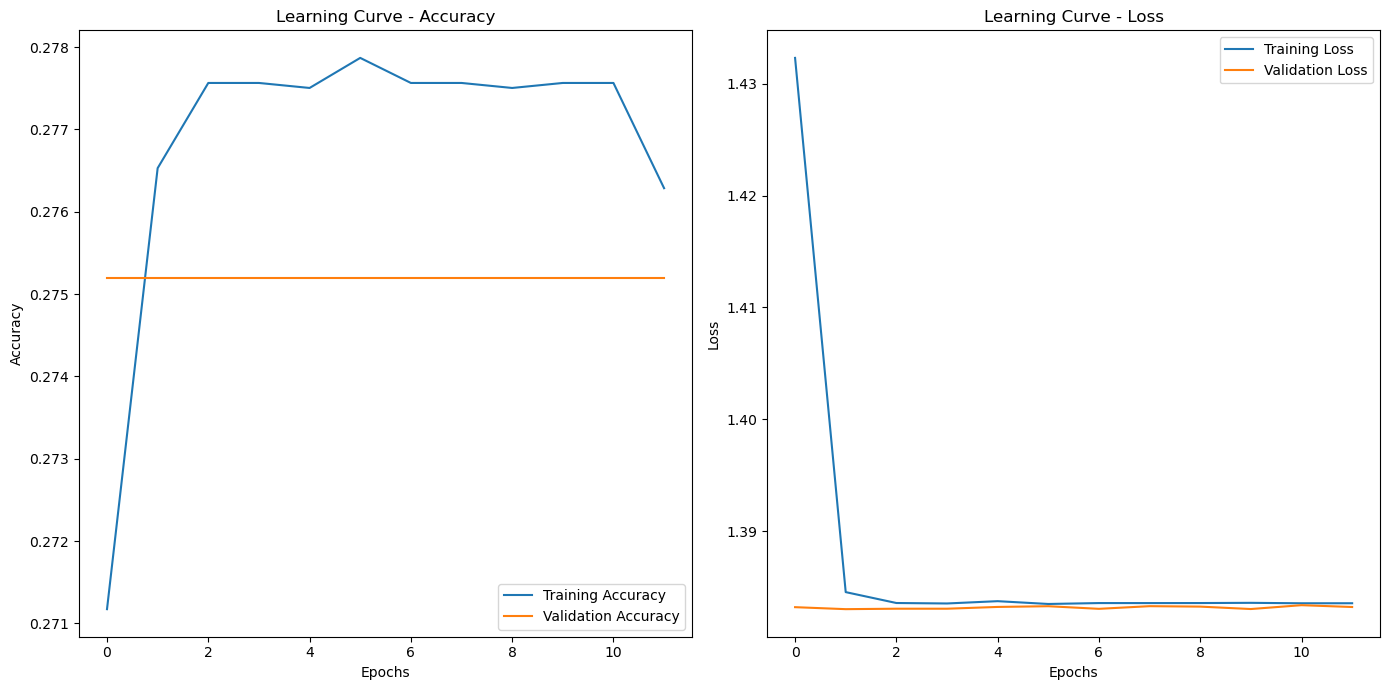

In [29]:
import matplotlib.pyplot as plt

# Plotting the learning curves
plt.figure(figsize=(14, 7))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### MATRIZ DE CONFUSÃO

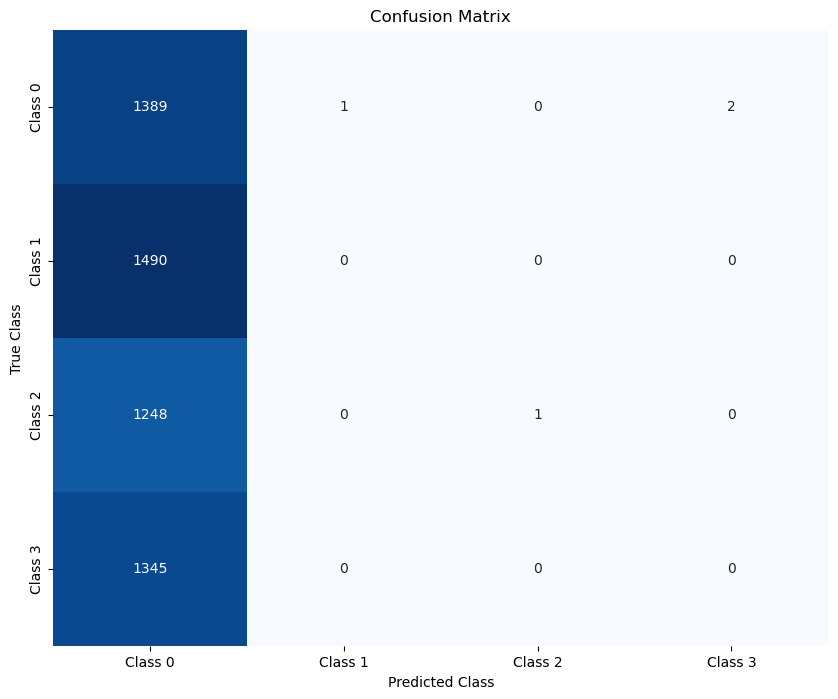

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Insert your Confusion Matrix data here
confusion_mtx = conf_matrix  # Assuming conf_matrix is defined elsewhere

# Axis labels
axis_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Setting the figure size
plt.figure(figsize=(10, 8))

# Creating the heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues", cbar=False, xticklabels=axis_labels, yticklabels=axis_labels)

# Adding title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

# Displaying the plot
plt.show()


172/172 [==============================] - 0s 2ms/step


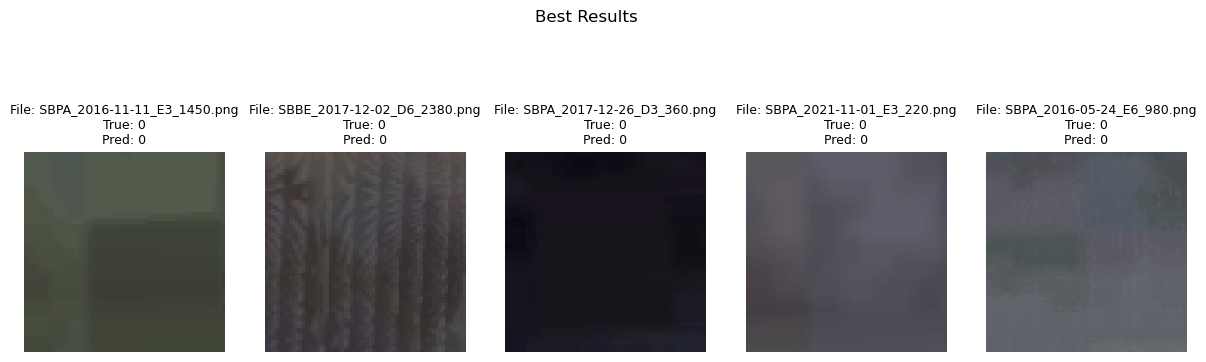

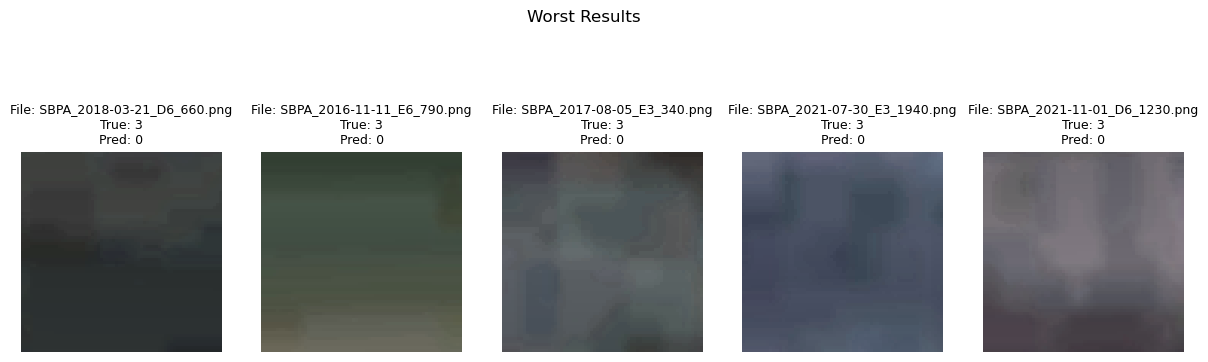

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que 'best_model' seja o seu modelo treinado, 'X_test' o seu conjunto de testes,
# 'y_test' os rótulos verdadeiros e 'filenames_test' os nomes dos arquivos correspondentes.
y_pred = best_model.predict(X_test)

# Para problemas de classificação, converte as probabilidades para rótulos de classe
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcula a diferença absoluta diretamente
losses = np.abs(y_test - y_pred_classes)

# Ordena as perdas e obtém os índices para as melhores e piores previsões
sorted_indices = np.argsort(losses)
best_indices = sorted_indices[:5]  # Primeiros 5 são os de menor perda
worst_indices = sorted_indices[-5:]  # Últimos 5 são os de maior perda

# Filtra os filenames para os melhores e piores índices
best_filenames = filenames_test[best_indices]
worst_filenames = filenames_test[worst_indices]

# Função para plotar os resultados
def plot_results(indices, images, true_labels, pred_labels, filenames, title):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[idx].squeeze(), cmap='gray')  # Ajuste conforme necessário
        plt.title(f"File: {filenames[i]}\nTrue: {true_labels[idx]}\nPred: {pred_labels[idx]}", fontsize=9)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plota os cinco melhores resultados com os filenames corretos
plot_results(best_indices, X_test, y_test, y_pred_classes, best_filenames, "Best Results")

# Plota os cinco piores resultados com os filenames corretos
plot_results(worst_indices, X_test, y_test, y_pred_classes, worst_filenames, "Worst Results")


172/172 [==============================] - 0s 2ms/step


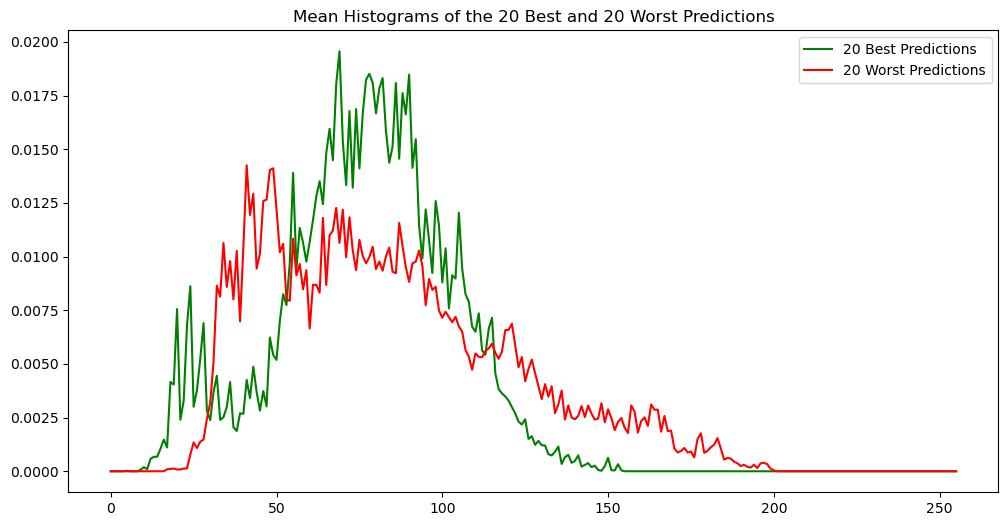

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar previsões no conjunto de teste usando o melhor modelo
y_pred = best_model.predict(X_test)

# Converter as previsões de probabilidades para rótulos de classe
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular a "perda" como a diferença entre os rótulos verdadeiros e previstos
losses = np.abs(y_test - y_pred_classes)

# Ordenar as perdas e identificar os índices das 20 melhores e 20 piores previsões
sorted_indices = np.argsort(losses)
best_indices = sorted_indices[:20]
worst_indices = sorted_indices[-20:]

def calculate_mean_histogram(images):
    histograms = [np.histogram(image.ravel(), bins=256, range=(0, 1))[0] for image in images]
    mean_histogram = np.mean(histograms, axis=0)
    return mean_histogram / mean_histogram.sum()  # Normalizar o histograma

# Selecionar as 20 melhores e 20 piores imagens com base nos índices identificados
best_images = X_test[best_indices]
worst_images = X_test[worst_indices]

# Calcular os histogramas médios para os dois conjuntos de imagens
mean_histogram_best = calculate_mean_histogram(best_images)
mean_histogram_worst = calculate_mean_histogram(worst_images)

# Plotar os histogramas médios no mesmo gráfico
plt.figure(figsize=(12, 6))
plt.plot(mean_histogram_best, color='green', label='20 Best Predictions')
plt.plot(mean_histogram_worst, color='red', label='20 Worst Predictions')
plt.title('Mean Histograms of the 20 Best and 20 Worst Predictions')
plt.legend()
plt.show()


## SALVANDO O MODELO

In [35]:
# Salvar o modelo no formato HDF5
best_model.save('meu_modelo_80_vgg19.h5')

# Salvar o modelo no formato SavedModel
best_model.save('meu_modelo_80_vgg19')


C:\Users\silve\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: meu_modelo_80_vgg19\assets


INFO:tensorflow:Assets written to: meu_modelo_80_vgg19\assets
